In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
df = pd.read_csv('C:/Users/Vikash/Desktop/house_price_data.csv')
df

,Id,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


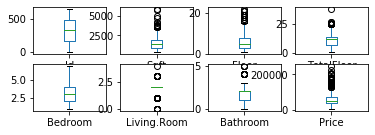

In [6]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

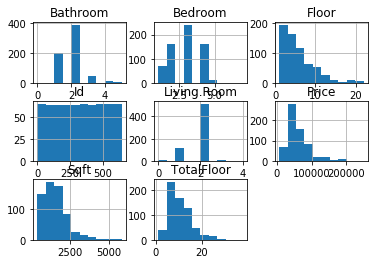

In [7]:
df.hist()
plt.show()

In [9]:
array = df.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [10]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [19]:
results = []
names = []
for name, model in models:
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

IndentationError: expected an indented block (<ipython-input-19-8877d6fbe0d3>, line 4)

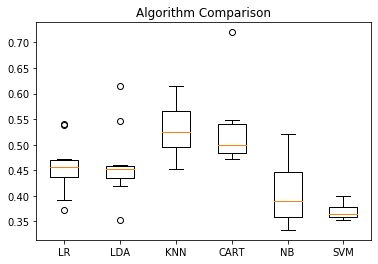

In [20]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [22]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [23]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.3798449612403101
[[ 0  0 16  0  0]
 [ 0  0 34  0  0]
 [ 0  0 49  0  0]
 [ 0  0 27  0  0]
 [ 0  0  3  0  0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.00      0.00      0.00        34
         3.0       0.38      1.00      0.55        49
         4.0       0.00      0.00      0.00        27
         5.0       0.00      0.00      0.00         3

    accuracy                           0.38       129
   macro avg       0.08      0.20      0.11       129
weighted avg       0.14      0.38      0.21       129



C:\Users\Vikash\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
